In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline





# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("solarpowergeneration.csv")

In [9]:
df.sample(5)

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2785,0.605392,67,30,8.5,1,10.0,83,3.0,29.93,0
272,0.944046,65,28,11.1,1,10.0,81,15.0,29.96,0
590,0.795417,60,28,6.0,0,10.0,78,10.0,30.10,0
1681,0.656042,57,32,15.4,0,10.0,42,24.0,30.03,0
2506,0.359589,62,28,13.3,3,10.0,83,7.0,30.00,1846


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [11]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [14]:
df.shape

(2920, 10)

In [15]:
df.corr()["power-generated"]

distance-to-solar-noon        -0.746681
temperature                    0.132193
wind-direction                 0.146788
wind-speed                     0.142641
sky-cover                     -0.187236
visibility                     0.076536
humidity                      -0.522545
average-wind-speed-(period)    0.278174
average-pressure-(period)     -0.036771
power-generated                1.000000
Name: power-generated, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

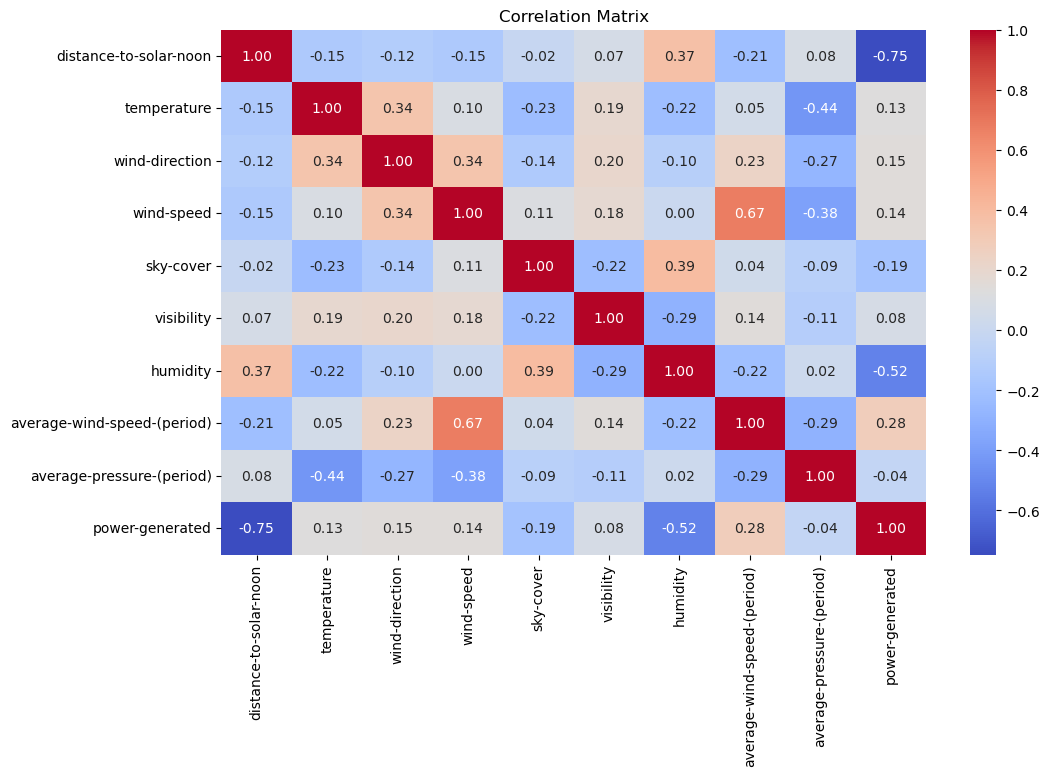

In [16]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


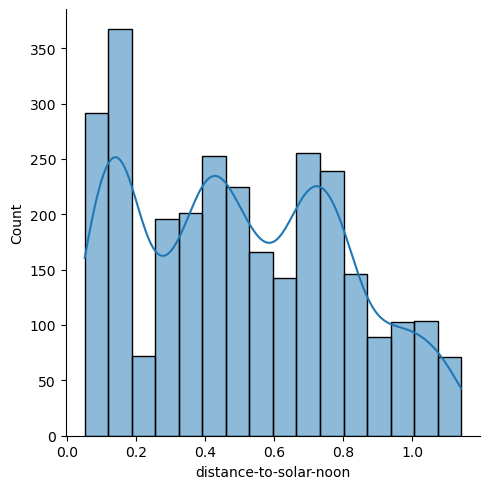

In [17]:
sns.displot(data=df,x="distance-to-solar-noon",kde=True)

<Axes: xlabel='distance-to-solar-noon'>

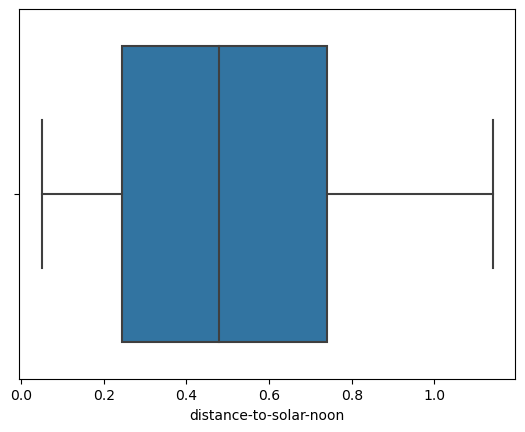

In [18]:
sns.boxplot(data=df,x="distance-to-solar-noon")

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance-to-solar-noon', ylabel='Count'>

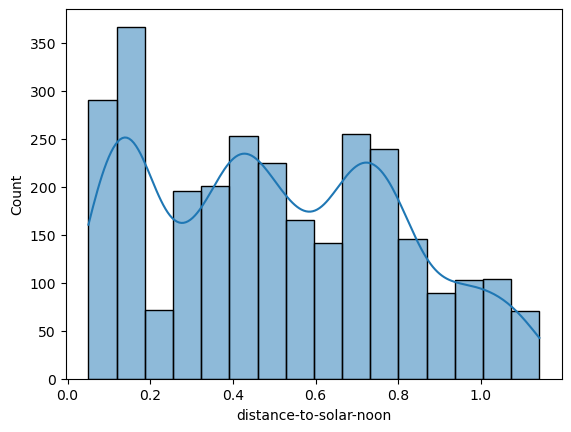

In [19]:
sns.histplot(data=df,x="distance-to-solar-noon",kde=True)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

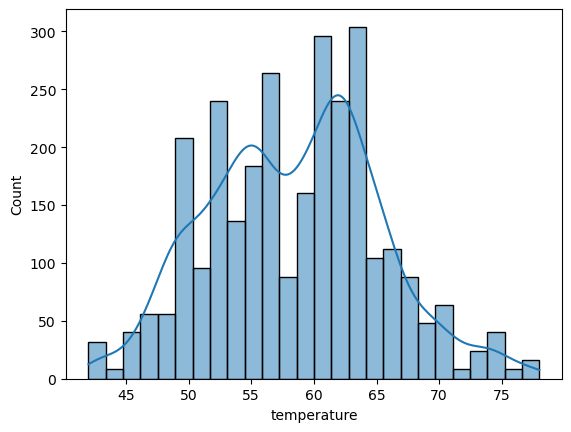

In [20]:
sns.histplot(data=df,x="temperature",kde=True)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


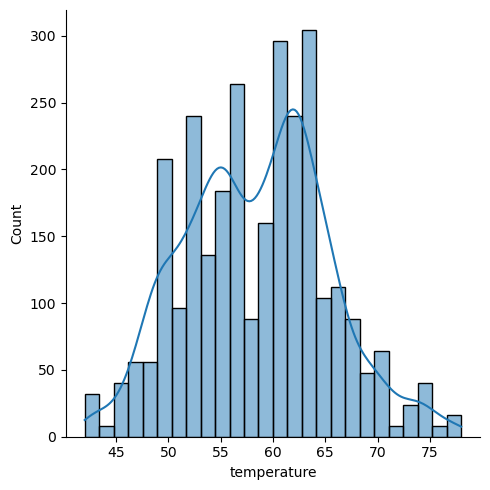

In [21]:
sns.displot(data=df,x="temperature",kde=True)

<Axes: xlabel='temperature'>

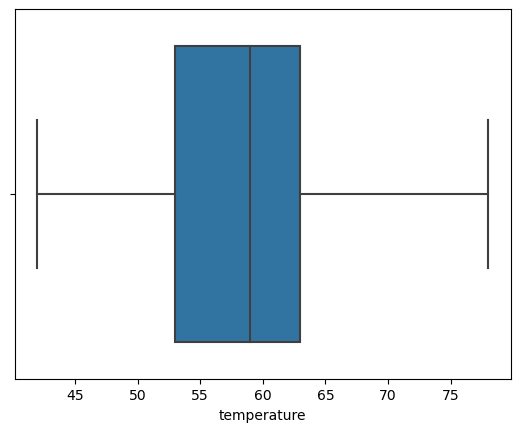

In [22]:
sns.boxplot(x=df["temperature"])

<Axes: xlabel='sky-cover', ylabel='count'>

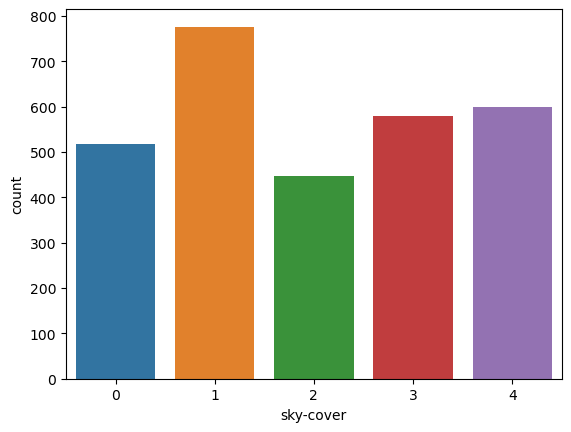

In [23]:
sns.countplot(x=df["sky-cover"])

<Axes: xlabel='humidity', ylabel='power-generated'>

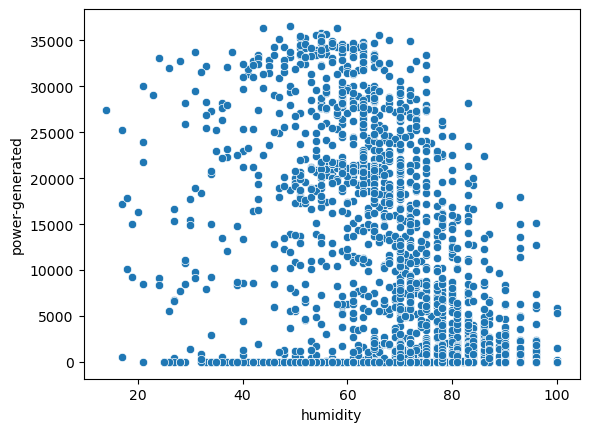

In [24]:
sns.scatterplot(data=df,x="humidity",y="power-generated")

<Axes: xlabel='temperature', ylabel='power-generated'>

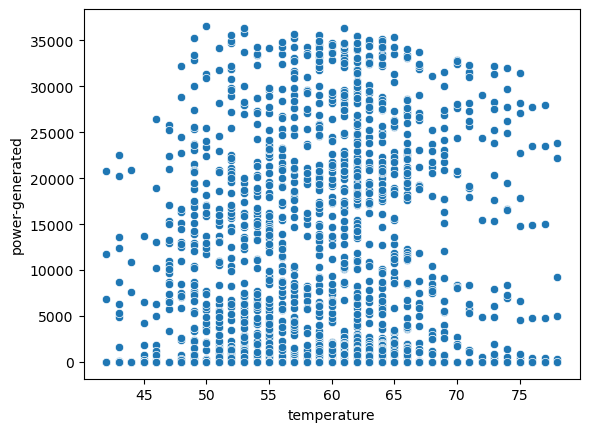

In [25]:
sns.scatterplot(data=df,x="temperature",y="power-generated")

<Axes: xlabel='wind-speed', ylabel='power-generated'>

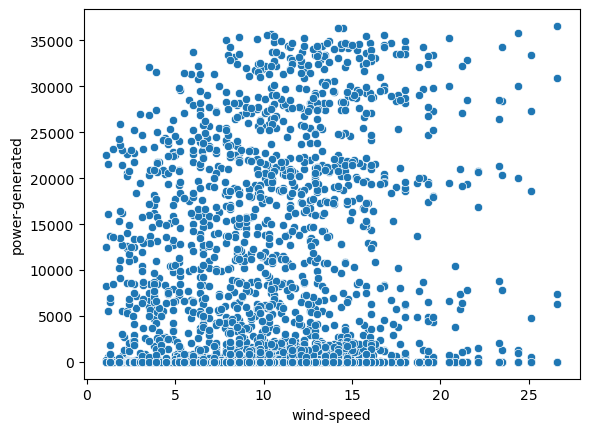

In [26]:
sns.scatterplot(x=df["wind-speed"],y=df["power-generated"])

<Axes: xlabel='distance-to-solar-noon', ylabel='power-generated'>

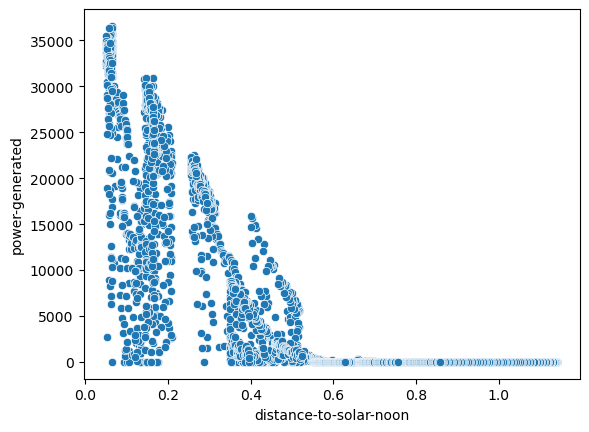

In [27]:
sns.scatterplot(data=df,x="distance-to-solar-noon",y="power-generated")

<Axes: xlabel='wind-direction', ylabel='power-generated'>

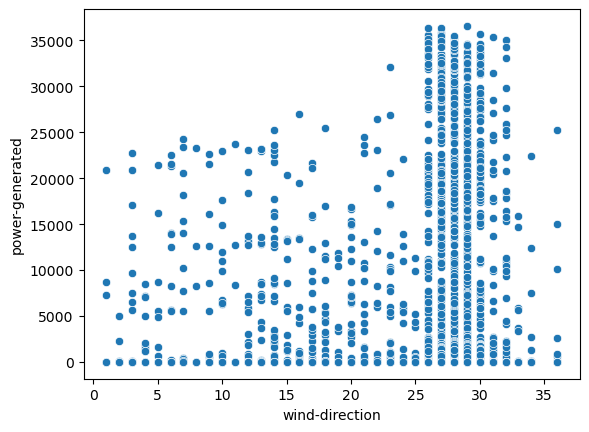

In [28]:
sns.scatterplot(x=df["wind-direction"],y=df["power-generated"])

<Axes: xlabel='average-wind-speed-(period)', ylabel='power-generated'>

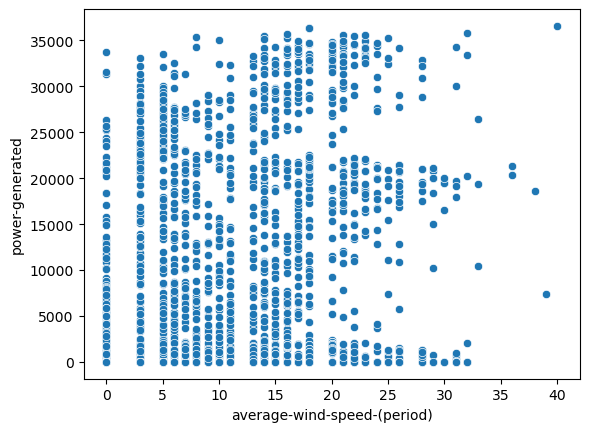

In [29]:
sns.scatterplot(data=df,x="average-wind-speed-(period)",y="power-generated")

<Axes: xlabel='average-pressure-(period)', ylabel='power-generated'>

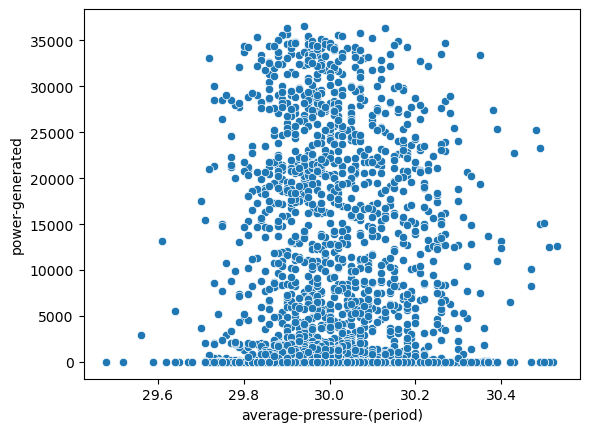

In [30]:
sns.scatterplot(x=df["average-pressure-(period)"],y=df["power-generated"])

In [31]:
df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean(), inplace=True)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


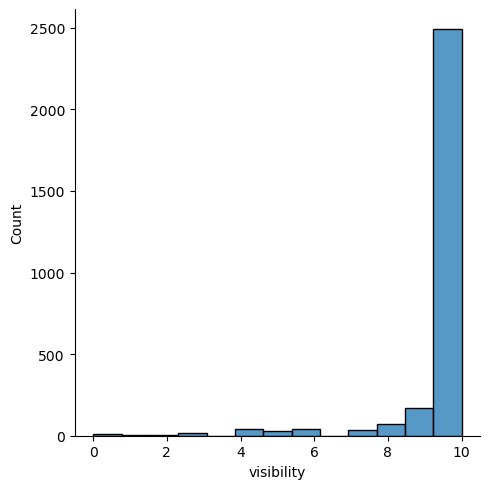

In [32]:
sns.displot(df["visibility"])

In [33]:
df.drop("visibility" , axis=1 , inplace= True)

In [34]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


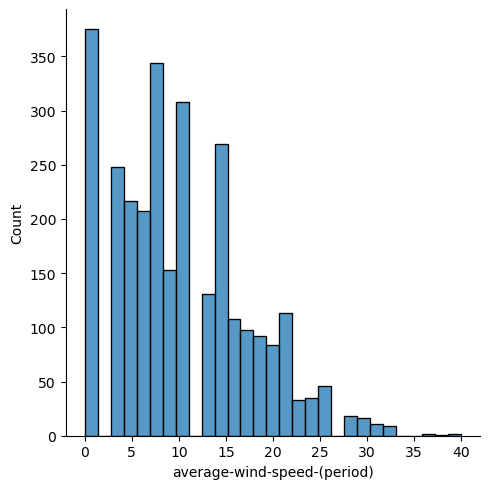

In [35]:
sns.displot(df["average-wind-speed-(period)"])

<Axes: xlabel='distance-to-solar-noon', ylabel='average-pressure-(period)'>

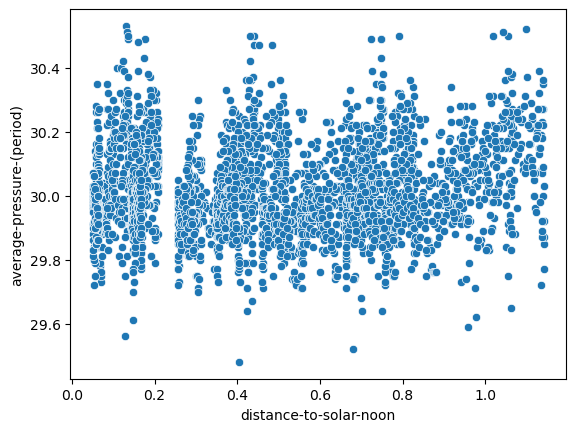

In [36]:
sns.scatterplot(x = df['distance-to-solar-noon'] , y = df["average-pressure-(period)"])

In [37]:
X = df.drop("power-generated" , axis =1)
y = df["power-generated"]

In [38]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [39]:
MM = MinMaxScaler()

In [40]:
result = MM.fit_transform(X)

In [41]:
X_new = pd.DataFrame(result)

In [42]:
X_new.columns = X.columns

In [43]:
MM_y = MinMaxScaler()
y = MM_y.fit_transform(df[["power-generated"]])
y.shape

(2920, 1)

# split the variable


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=42)

In [47]:
# Dictionary to store the results
results = {}

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(kernel='sigmoid'),
    'KNN Regression': KNeighborsRegressor(),
    'XGBoost Regression': xgb.XGBRegressor(random_state=42) , 
    'Lasso' : Lasso(alpha=100)
}

In [48]:
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2 , 'model' : model}
    # print(f'{name} - MSE: {mse}, MAE: {mae}, R-squared: {r2}')
    print(f'{name} - R-squared: {r2}')
    

Linear Regression - R-squared: 0.6249126898876155
Ridge Regression - R-squared: 0.6249938768369743
Lasso Regression - R-squared: -0.00013262475917064087
Elastic Net Regression - R-squared: -0.00013262475917064087
Decision Tree Regression - R-squared: 0.8148201835222297


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regression - R-squared: 0.8908276126344771


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regression - R-squared: 0.9013828450134214


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Regression - R-squared: -525.458525592354
KNN Regression - R-squared: 0.8508437487797116
XGBoost Regression - R-squared: 0.9070409903571224
Lasso - R-squared: -0.00013262475917064087


In [49]:
# parameters = {'alpha':(0.1 , 0.2 , 0.5 , 1.0 , 10 , 20 , 100)}
# clf = GridSearchCV(Lasso(), parameters)
# clf.fit(X_train, y_train)


In [50]:
alpha = 0.0000000001
LS = Lasso(alpha=alpha)
LS.fit(X_train , y_train)
y_pred = LS.predict(X_test)
pd.DataFrame(data = LS.coef_ , index = X_train.columns)

,0
distance-to-solar-noon,-0.663842
temperature,-0.072532
wind-direction,0.042723
wind-speed,0.003635
sky-cover,-0.101989
humidity,-0.373581
average-wind-speed-(period),0.148936
average-pressure-(period),0.042645


In [51]:
# plt.scatter(X_train["distance-to-solar-noon"], y_train,color='g')
# plt.plot(X_test["distance-to-solar-noon"], y_pred,color='k')
# plt.show()


In [52]:
df.corr()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.368964,-0.214887,0.082505,-0.746681
temperature,-0.145207,1.000000,0.342146,0.096267,-0.230672,-0.221463,0.054545,-0.435723,0.132193
wind-direction,-0.118010,0.342146,1.000000,0.341529,-0.137140,-0.095917,0.229706,-0.272405,0.146788
wind-speed,-0.145073,0.096267,0.341529,1.000000,0.107793,0.004901,0.673364,-0.379752,0.142641
sky-cover,-0.015184,-0.230672,-0.137140,0.107793,1.000000,0.394576,0.044301,-0.091512,-0.187236
humidity,0.368964,-0.221463,-0.095917,0.004901,0.394576,1.000000,-0.217959,0.018489,-0.522545
average-wind-speed-(period),-0.214887,0.054545,0.229706,0.673364,0.044301,-0.217959,1.000000,-0.293406,0.278154
average-pressure-(period),0.082505,-0.435723,-0.272405,-0.379752,-0.091512,0.018489,-0.293406,1.000000,-0.036771
power-generated,-0.746681,0.132193,0.146788,0.142641,-0.187236,-0.522545,0.278154,-0.036771,1.000000


In [53]:
# Pipeline

In [159]:
X = df.drop("power-generated" , axis =1)
y = df["power-generated"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [161]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('XGBoost', xgb.XGBRegressor(random_state=42))])

In [163]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('XGBoost',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [165]:
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score : {r2}")

R2 Score : 0.9088701164854025


In [167]:
import pickle

In [169]:
with open("solar_power.pkl" , 'wb') as file :
    pickle.dump(pipe , file)

In [171]:
data = {}
for i in X_train.columns :
    min_value = round(df[i].min() , 2)
    max_value = round(df[i].max() ,2)
    avg = round((min_value + max_value) / 2 , 2)
    print(f'{i} = st.sidebar.number_input("{i}" ,min_value= {min_value} , max_value= {max_value} , value= {avg} , step=1.0)')
    data[i] = i

distance-to-solar-noon = st.sidebar.number_input("distance-to-solar-noon" ,min_value= 0.05 , max_value= 1.14 , value= 0.59 , step=1.0)
temperature = st.sidebar.number_input("temperature" ,min_value= 42 , max_value= 78 , value= 60.0 , step=1.0)
wind-direction = st.sidebar.number_input("wind-direction" ,min_value= 1 , max_value= 36 , value= 18.5 , step=1.0)
wind-speed = st.sidebar.number_input("wind-speed" ,min_value= 1.1 , max_value= 26.6 , value= 13.85 , step=1.0)
sky-cover = st.sidebar.number_input("sky-cover" ,min_value= 0 , max_value= 4 , value= 2.0 , step=1.0)
humidity = st.sidebar.number_input("humidity" ,min_value= 14 , max_value= 100 , value= 57.0 , step=1.0)
average-wind-speed-(period) = st.sidebar.number_input("average-wind-speed-(period)" ,min_value= 0.0 , max_value= 40.0 , value= 20.0 , step=1.0)
average-pressure-(period) = st.sidebar.number_input("average-pressure-(period)" ,min_value= 29.48 , max_value= 30.53 , value= 30.01 , step=1.0)


In [173]:
print(data)

{'distance-to-solar-noon': 'distance-to-solar-noon', 'temperature': 'temperature', 'wind-direction': 'wind-direction', 'wind-speed': 'wind-speed', 'sky-cover': 'sky-cover', 'humidity': 'humidity', 'average-wind-speed-(period)': 'average-wind-speed-(period)', 'average-pressure-(period)': 'average-pressure-(period)'}
